# Introduction to Machine Learning with Python

## Learning Goals

- Supervised vs Unsupervised Learning
- Understand Supervised learning workflow
- Build our first model using Scikit-Learn
- Use correct matrics to evaluate model performance

# Supervised vs Unsupervised Learning

- Supervised Learning
  - The model is trained on a labeled dataset, which means that each training example is paired with an output label.
  - The goal is to learn a mapping from inputs to outputs, allowing the model to predict the output for new, unseen inputs.
  - Examples: Classification (e.g., spam detection, image recognition), Regression (e.g., predicting house prices, stock prices).

- Unsupervised Learning
  - The model is trained on an unlabeled dataset, meaning that the data does not have predefined labels or outputs.
  - The goal is to find patterns, structures, or relationships within the data.
  - Examples: Clustering (e.g., customer segmentation, image compression), Dimensionality Reduction (e.g., PCA, t-SNE).

## Supervised Learning Workflow

1. Split the data into training and testing sets
2. Choose a model and configure its parameters
3. Train the model on the training set
4. Evaluate the model on the testing set
5. Fine-tune the model as needed

In [ ]:
## Regression Problems

# V = IR + Error

In [2]:
import numpy as np

# Mock data generation
rng = np.random.default_rng(0)
n = 600
R_true = 120.0
I = rng.uniform(0, 2.0, size=(n, 1))
noise = rng.normal(0, 0.1, size=(n, 1))
V = R_true * I + noise

In [8]:
# split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(I, V.ravel(), test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Matplotlib is building the font cache; this may take a moment.


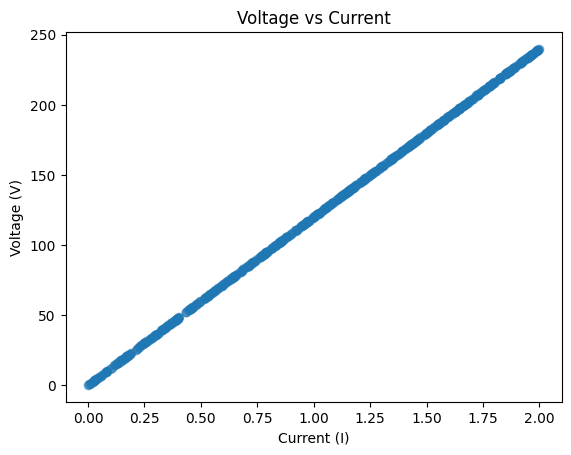

In [9]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(I, V, alpha=0.5)
plt.xlabel('Current (I)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val:.4f}')
print(f'Test MSE: {mse_test:.4f}')

Validation MSE: 0.0089
Test MSE: 0.0115


In [13]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train:.4f}')

Training MSE: 0.0087


In [14]:
## Classification Problems

# - Classify handwritten digits (0-9) from images

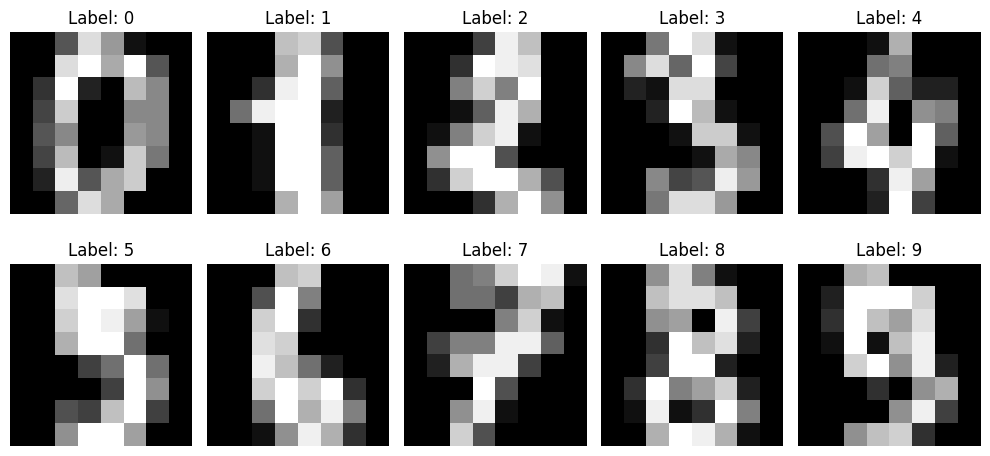

In [15]:
# Classify handwritten digits (0-9) from images

from sklearn.datasets import load_digits

digits = load_digits()

#visualize some digits

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9741
Test Accuracy: 0.9778
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        27
           3       0.97      1.00      0.99        33
           4       0.97      1.00      0.98        29
           5       0.93      0.93      0.93        27
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        27
           8       1.00      0.96      0.98        25
           9       0.96      0.92      0.94        24

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

Confusion Matrix (Test Set):
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0 

In [18]:
# Try the Model on New Data

new_sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(new_sample)
print(f'Predicted class for the new sample: {predicted_class[0]}')

Predicted class for the new sample: 2


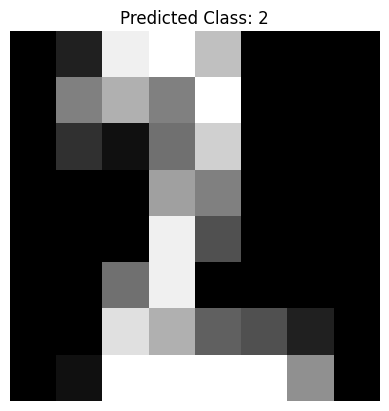

In [19]:
# Visualize the new sample
plt.imshow(new_sample.reshape(8, 8), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.axis('off')
plt.show()

Exercise: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset Using this dataset, build a regression model to predict house prices based on features such as size, number of bedrooms, location, etc. Evaluate your model's performance using appropriate metrics and visualize the results.